<a href="https://colab.research.google.com/github/keshav123333/Teeth_mask_Unet/blob/main/UNetmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import tensorflow as tf

In [24]:
def downsample(x,filters):
  x=tf.keras.layers.Conv2D(filters=filters,kernel_size=(2,2),padding = 'same')(x)
  x=tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding = 'same')(x)
  x=tf.keras.layers.Activation(activation='relu')(x)
  return x

In [25]:
def upsampling(x,resudial_x,filters):
  x=tf.keras.layers.Conv2D(filters=filters,kernel_size=(2,2),padding='same')(x)

  x = tf.keras.layers.Conv2DTranspose(
        filters= filters,
        kernel_size=(2, 2),
        strides=(2, 2),
        padding='same',

    )(x)
  x=tf.keras.layers.Add()([x,resudial_x])
  x=tf.keras.layers.Activation(activation='relu')(x)
  return x


In [26]:
def UNet():
  inputs=tf.keras.layers.Input(shape=(256,256,3))
  d1  = downsample(inputs,16) #128
  d2  = downsample(d1,32) #64
  d3  = downsample(d2,64) #32
  d4  = downsample(d3,128) #16
  u3 = upsampling(d4,d3,64) #32
  u2 = upsampling(u3,d2,32) #64
  u1 = upsampling(u2,d1,16) #128
  u0 = tf.keras.layers.UpSampling2D(size=(2,2))(u1)
  outputs = tf.keras.layers.Conv2D(filters=1,kernel_size=(1,1),activation = 'sigmoid',padding='same')(u0)
  model = tf.keras.models.Model(inputs=inputs,outputs=outputs)
  return model



In [27]:
model = UNet()

In [28]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 256, 256,  │        208 │ input_layer_1[0]… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 128, 128,  │          0 │ conv2d_8[0][0]    │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_7        │ (None, 128, 128,  │          0 │ max_pooling2d_4[… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 128, 128,  │      2,080 │ activation_7[0][… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 64, 64,    │          0 │ conv2d_9[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_8        │ (None, 64, 64,    │          0 │ max_pooling2d_5[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 64, 64,    │      8,256 │ activation_8[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 32, 32,    │          0 │ conv2d_10[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_9        │ (None, 32, 32,    │          0 │ max_pooling2d_6[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 32, 32,    │     32,896 │ activation_9[0][… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_7     │ (None, 16, 16,    │          0 │ conv2d_11[0][0]   │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_10       │ (None, 16, 16,    │          0 │ max_pooling2d_7[… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 16, 16,    │     32,832 │ activation_10[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose    │ (None, 32, 32,    │     16,448 │ conv2d_12[0][0]   │
│ (Conv2DTranspose)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 32, 32,    │          0 │ conv2d_transpose… │
│                     │ 64)               │            │ activation_9[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_11       │ (None, 32, 32,    │          0 │ add_3[0][0]     

 Total params: 108,193 (422.63 KB)

 Trainable params: 108,193 (422.63 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
#unzip file

import zipfile

# Path to the zip file
zip_path = '/content/GumsTeethDataSet-20250607T152405Z-1-001.zip'

# Destination folder to extract files
extract_to = '/content/train'

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

In [30]:
import numpy as np


In [31]:
import os
def image_read_input(folder_path):
  images = []
  filenames = os.listdir(folder_path)
  filenames.sort()
  for filename in filenames:
    img_path = os.path.join(folder_path, filename)
    img = tf.io.read_file(img_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize_with_pad(
            img,
            target_height=256,
            target_width=256,
            method=tf.image.ResizeMethod.BILINEAR,
            antialias=False
          )/255
    images.append(img)
  print(np.array(images).shape)
  images_batch = tf.stack(images)
  return images_batch

In [32]:
batch=image_read_input('/content/train/GumsTeethDataSet/OriginalImages')

(82, 256, 256, 3)


In [33]:
import os
def mask_read_input(folder_path):
  images = []
  filenames = os.listdir(folder_path)
  filenames.sort()
  for filename in filenames:
    img_path = os.path.join(folder_path, filename,"Teeth.png")

    img = tf.io.read_file(img_path)
    img = tf.image.decode_jpeg(img, channels=1)
    img = tf.image.resize_with_pad(
            img,
            target_height=256,
            target_width=256,
            method=tf.image.ResizeMethod.BILINEAR,
            antialias=False
          )/255
    images.append(img)
  images_batch = tf.stack(images)
  return images_batch


In [34]:
batch_mask=mask_read_input("/content/train/GumsTeethDataSet/Masks")

In [35]:
batch_mask

<tf.Tensor: shape=(82, 256, 256, 1), dtype=float32, numpy=
array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
   

In [36]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [37]:
history=model.fit(batch, batch_mask, epochs=500, batch_size=2)

Epoch 1/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.7795 - loss: 0.6225
Epoch 2/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8657 - loss: 0.2844
Epoch 3/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9100 - loss: 0.2047
Epoch 4/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9154 - loss: 0.1881
Epoch 5/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9280 - loss: 0.1569
Epoch 6/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9310 - loss: 0.1484
Epoch 7/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9318 - loss: 0.1498
Epoch 8/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9251 - loss: 0.1708
Epoch 9/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9366 - loss: 0.1367
Epoch 10/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9358 - loss: 0.1364
Epoch 11/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9400 - loss: 0.1280
Epoch 12/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accurac

In [38]:
img_path="/content/train/GumsTeethDataSet/OriginalImages/75.jpg"

img_test=tf.io.read_file(img_path)
img_test=tf.image.decode_jpeg(img_test,channels=3)

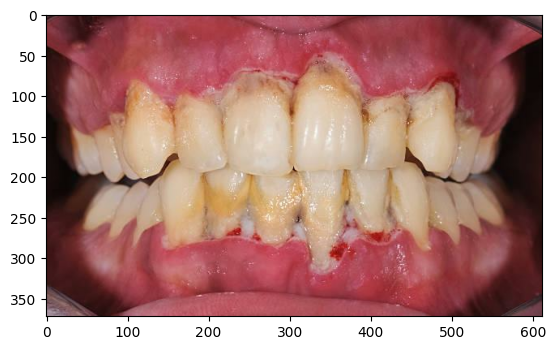

In [39]:
import matplotlib.pyplot as plt
plt.imshow(img_test)

In [40]:
img_test = tf.image.resize_with_pad(
            img_test,
            target_height=256,
            target_width=256,
            method=tf.image.ResizeMethod.BILINEAR,
            antialias=False
          )/255

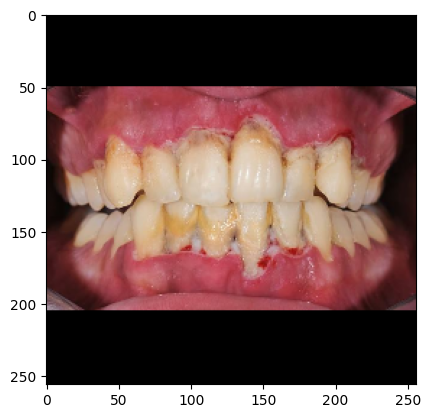

In [41]:
plt.imshow(img_test)

In [42]:
img_test=tf.expand_dims(img_test,axis=0)

In [43]:
test_pred=model(img_test)

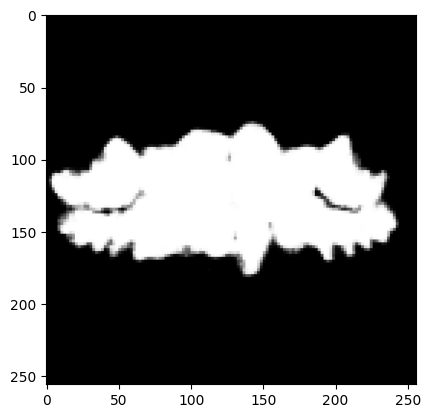

In [44]:
plt.imshow(test_pred[0],cmap='gray')

plt.show()

In [45]:
model.save("Teeth_mask.h5")